In [1]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
cigs_use = pd.read_csv('../data/Current Cigarette Use Among Adults (Behavior Risk Factor Surveillance System) 2018.csv')
cigs_use

,Location,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,Alabama,19.2,17.9,20.5,"6,347"
1,Alaska,19.1,16.9,21.3,"2,698"
2,Arizona,14.0,12.7,15.3,"7,758"
3,Arkansas,22.7,20.9,24.5,"5,177"
4,California,11.2,10.4,12.0,"11,118"
5,Colorado,14.5,13.6,15.4,"8,188"
6,Connecticut,12.2,11.3,13.1,"10,276"
7,Delaware,16.5,15.1,17.9,"5,011"
8,District of Columbia,13.8,12.3,15.3,"4,137"
9,Florida,14.5,13.4,15.6,"14,589"


In [3]:
URL = 'https://www.cdc.gov/mmwr/volumes/71/wr/mm7111a1.htm#T1_down'

response = requests.get(URL)

In [4]:
type(requests)

module

In [5]:
response.status_code

200

In [6]:
response.text

'\r\n<!DOCTYPE html>\r\n<html lang="en-us" class="theme-indigo cdc-page-type-" >\r\n<head>\r\n\t\r\n<!-- Global / universal meta tags -->\r\n<meta charset="utf-8" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport" />\r\n<meta name="mobile-web-app-capable" content="yes" />\r\n<meta name="apple-mobile-web-app-capable" content="yes" />\r\n<meta name="theme-color" content="#075290">\r\n\r\n<link rel="shortcut icon" href="/TemplatePackage/4.0/assets/imgs/favicon.ico?_=202112">\r\n<link rel="icon" type="image/png" sizes="32x32" href="/TemplatePackage/4.0/assets/imgs/favicon-32x32.png">\r\n<link rel="apple-touch-icon" sizes="60x60" href="/TemplatePackage/4.0/assets/imgs/apple-touch-icon-60x60.png">\r\n<link rel="apple-touch-icon" sizes="180x180" href="/TemplatePackage/4.0/assets/imgs/apple-touch-icon-180x180.png">\r\n\r\n<link rel="stylesheet prefetch" href="/TemplatePackage/contrib/libs/bootst

In [7]:
soup = BS(response.text)
soup

<!DOCTYPE html>
<html class="theme-indigo cdc-page-type-" lang="en-us">
<head>
<!-- Global / universal meta tags -->
<meta charset="utf-8"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="#075290" name="theme-color"/>
<link href="/TemplatePackage/4.0/assets/imgs/favicon.ico?_=202112" rel="shortcut icon"/>
<link href="/TemplatePackage/4.0/assets/imgs/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="/TemplatePackage/4.0/assets/imgs/apple-touch-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/TemplatePackage/4.0/assets/imgs/apple-touch-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/TemplatePackage/contrib/libs/bootstrap/latest/css/bootstrap.min.css?_=85006" rel="stylesheet prefetch"/>
<link href="/Templ

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html class="theme-indigo cdc-page-type-" lang="en-us">
 <head>
  <!-- Global / universal meta tags -->
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="#075290" name="theme-color"/>
  <link href="/TemplatePackage/4.0/assets/imgs/favicon.ico?_=202112" rel="shortcut icon"/>
  <link href="/TemplatePackage/4.0/assets/imgs/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/TemplatePackage/4.0/assets/imgs/apple-touch-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/TemplatePackage/4.0/assets/imgs/apple-touch-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/TemplatePackage/contrib/libs/bootstrap/latest/css/bootstrap.min.css?_=85006" rel="stylesheet prefe

In [9]:
soup.find('title')

<title>Tobacco Product Use Among Adults â United States, 2020  | MMWR</title>

In [10]:
soup.findAll('table')

[<table class="table table-bordered table-responsive">
 <caption class="caption-top h4 text-black" style="text-align: left"><a id="T1_down"></a>
 <h5><strong>TABLE. Percentage of adults aged ≥18 years who reported tobacco product use “every day” or “some days,” by tobacco product and selected characteristics — National Health Interview Survey, United States, 2020</strong><a href="#T1_up"><img alt="Return to your place in the text" border="0" class="float-right" height="34" loading="lazy" src="//www.cdc.gov/images/arrow_up.gif" title="Return to your place in the text" width="58"/></a></h5>
 </caption>
 <thead>
 <tr>
 <th align="left" class="row1left" rowspan="2" scope="col" valign="bottom">Characteristic</th>
 <th align="center" class="row1" colspan="8" scope="col" valign="bottom">Tobacco product use,* % (95% CI)<sup>†</sup></th>
 </tr>
 <tr>
 <th align="center" class="row1" colspan="1" scope="col" valign="bottom">Any tobacco product<sup>§</sup></th>
 <th align="center" class="row1" sco

In [11]:
soup.find('table', attrs={'class' : 'table-bordered'})

<table class="table table-bordered table-responsive">
<caption class="caption-top h4 text-black" style="text-align: left"><a id="T1_down"></a>
<h5><strong>TABLE. Percentage of adults aged ≥18 years who reported tobacco product use “every day” or “some days,” by tobacco product and selected characteristics — National Health Interview Survey, United States, 2020</strong><a href="#T1_up"><img alt="Return to your place in the text" border="0" class="float-right" height="34" loading="lazy" src="//www.cdc.gov/images/arrow_up.gif" title="Return to your place in the text" width="58"/></a></h5>
</caption>
<thead>
<tr>
<th align="left" class="row1left" rowspan="2" scope="col" valign="bottom">Characteristic</th>
<th align="center" class="row1" colspan="8" scope="col" valign="bottom">Tobacco product use,* % (95% CI)<sup>†</sup></th>
</tr>
<tr>
<th align="center" class="row1" colspan="1" scope="col" valign="bottom">Any tobacco product<sup>§</sup></th>
<th align="center" class="row1" scope="col" val

In [12]:
pd.read_html(str(soup.find('table', attrs={'class' : 'table-bordered'})))[0]

Characteristic  \
                                       Characteristic   
0                                             Overall   
1                                                 Sex   
2                                                 Men   
3                                               Women   
4                                      Age group, yrs   
5                                               18–24   
6                                               25–44   
7                                               45–64   
8                                                 ≥65   
9                               Race and ethnicity§§§   
10     American Indian or Alaska Native, non-Hispanic   
11                                White, non-Hispanic   
12                                Black, non-Hispanic   
13                                Asian, non-Hispanic   
14                                Other, non-Hispanic   
15                                           Hispanic   
16                             U.S. Census region****   
17                                          Northeast   
18                                            Midwest   
19                                              South   
20                                               West   
21                  Metropolitan statistical area††††   
22                                              Urban   
23                                              Rural   
24                    Education (adults aged ≥25 yrs)   
25                              0–12 yrs (no diploma)   
26                                                GED   
27                                High school diploma   
28                           Some college, no diploma   
29  Associate degree (academic or technical/vocati...   
30                                  Bachelor’s degree   
31  Graduate degree (master’s, professional, or do...   
32                                     Marital status   
33                        Married/Living with partner   
34                         Divorced/Separated/Widowed   
35     Single/Never married/Not living with a partner   
36                     Annual household income, $§§§§   
37                                            <35,000   
38                                      35,000–74,999   
39                                      75,000–99,999   
40                                           ≥100,000   
41                                 Sexual orientation   
42                              Heterosexual/Straight   
43                          Lesbian, gay, or bisexual   
44                      Health insurance coverage¶¶¶¶   
45                                  Private insurance   
46                                           Medicaid   
47                       Medicare only (aged ≥65 yrs)   
48                             Other public insurance   
49                                          Uninsured   
50                                    Disability*****   
51                                                Yes   
52                                                 No   
53          Regularly having feelings of anxiety†††††   
54                                                Yes   
55                                                 No   
56       Regularly having feelings of depression§§§§§   
57                                                Yes   
58                                                 No   

               Tobacco product use,* % (95% CI)†  \
                            Any tobacco product§   
0                               19.0 (18.4–19.7)   
1                                            Sex   
2                               24.5 (23.5–25.5)   
3                               13.9 (13.2–14.7)   
4                                 Age group, yrs   
5                               17.6 (15.5–19.9)   
6                               22.9 (21.8–24.0)   
7                               20.4 (19.4–21.5)   
8                               11.8 (10.

In [13]:
annual_2020 = pd.read_csv('../data/2020-Annual.csv')
annual_2020

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2020,2020 Annual,Access to Care - Annual,Alaska,21.0,0.372,0.372,NaN,NaN,AHR data,NaN
1,2020,2020 Annual,Access to Care - Annual,Alabama,47.0,-1.165,-1.165,NaN,NaN,AHR data,NaN
2,2020,2020 Annual,Access to Care - Annual,Arkansas,43.0,-0.709,-0.709,NaN,NaN,AHR data,NaN
3,2020,2020 Annual,Access to Care - Annual,Arizona,40.0,-0.643,-0.643,NaN,NaN,AHR data,NaN
4,2020,2020 Annual,Access to Care - Annual,California,22.0,0.360,0.360,NaN,NaN,AHR data,NaN
...,...,...,...,...,...,...,...,...,...,...,...
50383,2020,2020 Annual,Water Fluoridation,Vermont,40.0,56.200,-0.740,NaN,NaN,AHR data,NaN
50384,2020,2020 Annual,Water Fluoridation,Washington,34.0,63.900,-0.400,NaN,NaN,AHR data,NaN
50385,2020,2020 Annual,Water Fluoridation,Wisconsin,18.0,87.300,0.630,NaN,NaN,AHR data,NaN
50386,2020,2020 Annual,Water Fluoridation,West Virginia,12.0,90.700,0.780,NaN,NaN,AHR data,NaN


In [14]:
smoking_2020 = annual_2020.loc[annual_2020['Measure Name'].str.contains('Smoking', case=False)]
smoking_2020 = smoking_2020.reset_index(drop = True)
smoking_2020

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2020,2020 Annual,Non-smoking Regulation,Alaska,29.0,47.10,-0.32,NaN,NaN,AHR data,NaN
1,2020,2020 Annual,Non-smoking Regulation,Alabama,37.0,13.40,-1.08,NaN,NaN,AHR data,NaN
2,2020,2020 Annual,Non-smoking Regulation,United States,NaN,61.10,NaN,NaN,NaN,AHR data,NaN
3,2020,2020 Annual,Non-smoking Regulation,Arkansas,40.0,0.50,-1.38,NaN,NaN,AHR data,NaN
4,2020,2020 Annual,Non-smoking Regulation,Arizona,1.0,100.00,0.88,NaN,NaN,AHR data,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1243,2020,2020 Annual,Smoking and Tobacco Use - Annual,Wisconsin,22.0,0.15,0.15,NaN,NaN,AHR data,NaN
1244,2020,2020 Annual,Smoking and Tobacco Use - Annual,West Virginia,49.0,-2.00,-2.00,NaN,NaN,AHR data,NaN
1245,2020,2020 Annual,Smoking and Tobacco Use - Annual,Wyoming,37.0,-0.76,-0.76,NaN,NaN,AHR data,NaN
1246,2020,2020 Annual,Smoking and Tobacco Use - Annual,United States,NaN,NaN,NaN,NaN,NaN,AHR data,NaN


In [15]:
annual_2019 = pd.read_csv('../data/2019-Annual.csv')
annual_2019

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2019,2019 Annual,Adverse Childhood Experiences,Alaska,34.0,24.1,0.96,27.7,20.5,AHR data,NaN
1,2019,2019 Annual,Adverse Childhood Experiences,Alabama,46.0,26.3,1.56,30.1,22.5,AHR data,NaN
2,2019,2019 Annual,Adverse Childhood Experiences,United States,NaN,20.5,NaN,21.2,19.8,AHR data,NaN
3,2019,2019 Annual,Adverse Childhood Experiences,Arkansas,47.0,27.1,1.76,30.8,23.3,AHR data,NaN
4,2019,2019 Annual,Adverse Childhood Experiences,Arizona,48.0,27.3,1.82,31.1,23.4,AHR data,NaN
...,...,...,...,...,...,...,...,...,...,...,...
61504,2019,2019 Annual,Water Fluoridation,Vermont,40.0,56.2,-0.73,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
61505,2019,2019 Annual,Water Fluoridation,Washington,34.0,63.9,-0.39,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
61506,2019,2019 Annual,Water Fluoridation,Wisconsin,17.0,88.3,0.68,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
61507,2019,2019 Annual,Water Fluoridation,West Virginia,12.0,90.3,0.77,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014


In [16]:
smoking_2019 = annual_2019.loc[annual_2019['Measure Name'].str.contains('Smoking', case=False)]
smoking_2019 = smoking_2019.reset_index(drop = True)
smoking_2019

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2019,2019 Annual,Non-smoking Regulation,Alaska,28.0,42.6,-0.37,NaN,NaN,AHR data,NaN
1,2019,2019 Annual,Non-smoking Regulation,Alabama,36.0,13.4,-1.03,NaN,NaN,AHR data,NaN
2,2019,2019 Annual,Non-smoking Regulation,United States,NaN,59.0,NaN,NaN,NaN,AHR data,NaN
3,2019,2019 Annual,Non-smoking Regulation,Arkansas,40.0,0.5,-1.33,NaN,NaN,AHR data,NaN
4,2019,2019 Annual,Non-smoking Regulation,Arizona,1.0,100.0,0.93,NaN,NaN,AHR data,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1191,2019,2019 Annual,Smoking - White,West Virginia,50.0,25.1,2.00,26.7,23.4,"CDC, Behavioral Risk Factor Surveillance System",2018
1192,2019,2019 Annual,Smoking - White,Wisconsin,27.0,16.4,0.03,18.0,14.9,"CDC, Behavioral Risk Factor Surveillance System",2018
1193,2019,2019 Annual,Smoking - White,Wyoming,33.0,17.4,0.32,19.0,15.7,"CDC, Behavioral Risk Factor Surveillance System",2018
1194,2019,2019 Annual,Smoking - White,District of Columbia,NaN,6.9,NaN,8.9,5.0,"CDC, Behavioral Risk Factor Surveillance System",2018


In [17]:
annual_2018 = pd.read_csv('../data/2018-Annual.csv')
annual_2018

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2018,2018 Annual,Adverse Childhood Experiences,Alaska,28.0,23.8,0.53,NaN,NaN,AHR data,NaN
1,2018,2018 Annual,Adverse Childhood Experiences,Alabama,46.0,27.7,1.51,NaN,NaN,AHR data,NaN
2,2018,2018 Annual,Adverse Childhood Experiences,United States,NaN,21.7,NaN,NaN,NaN,AHR data,NaN
3,2018,2018 Annual,Adverse Childhood Experiences,Arkansas,49.0,29.6,1.98,NaN,NaN,AHR data,NaN
4,2018,2018 Annual,Adverse Childhood Experiences,Arizona,50.0,30.6,2.00,NaN,NaN,AHR data,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60876,2018,2018 Annual,Water Fluoridation,Vermont,40.0,56.3,-0.79,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
60877,2018,2018 Annual,Water Fluoridation,Washington,33.0,63.9,-0.46,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
60878,2018,2018 Annual,Water Fluoridation,Wisconsin,16.0,88.9,0.64,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
60879,2018,2018 Annual,Water Fluoridation,West Virginia,14.0,90.5,0.71,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014


In [18]:
smoking_2018 = annual_2018.loc[annual_2018['Measure Name'].str.contains('Smoking', case=False)]
smoking_2018 = smoking_2018.reset_index(drop = True)
smoking_2018

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2018,2018 Annual,Smoking,Alabama,41.0,20.9,1.09,22.4,19.5,"CDC, Behavioral Risk Factor Surveillance System",2017
1,2018,2018 Annual,Smoking,Alaska,42.0,21.0,1.11,23.7,18.3,"CDC, Behavioral Risk Factor Surveillance System",2017
2,2018,2018 Annual,Smoking,Arizona,16.0,15.6,-0.43,16.4,14.7,"CDC, Behavioral Risk Factor Surveillance System",2017
3,2018,2018 Annual,Smoking,Arkansas,46.0,22.3,1.49,24.5,20.0,"CDC, Behavioral Risk Factor Surveillance System",2017
4,2018,2018 Annual,Smoking,California,2.0,11.3,-1.66,12.3,10.4,"CDC, Behavioral Risk Factor Surveillance System",2017
...,...,...,...,...,...,...,...,...,...,...,...
1295,2018,2018 Annual,Smoking - White,West Virginia,50.0,25.6,2.00,27.2,24.0,"CDC, Behavioral Risk Factor Surveillance System",2017
1296,2018,2018 Annual,Smoking - White,Wisconsin,19.0,16.1,-0.29,17.5,14.6,"CDC, Behavioral Risk Factor Surveillance System",2017
1297,2018,2018 Annual,Smoking - White,Wyoming,34.0,18.2,0.32,19.9,16.6,"CDC, Behavioral Risk Factor Surveillance System",2017
1298,2018,2018 Annual,Smoking - White,United States,NaN,17.1,NaN,17.4,16.8,"CDC, Behavioral Risk Factor Surveillance System",2017


In [19]:
annual_2017 = pd.read_csv('../data/2017-Annual.csv')
annual_2017

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2017,2017 Annual,Air Pollution,Alaska,36.0,8.7,0.06,NaN,NaN,U.S. Environmental Protection Agency,2014-2016
1,2017,2017 Annual,Air Pollution,Alabama,39.0,8.9,0.19,NaN,NaN,U.S. Environmental Protection Agency,2014-2016
2,2017,2017 Annual,Air Pollution,Arkansas,16.0,7.2,-0.90,NaN,NaN,U.S. Environmental Protection Agency,2014-2016
3,2017,2017 Annual,Air Pollution,Arizona,46.0,9.7,0.71,NaN,NaN,U.S. Environmental Protection Agency,2014-2016
4,2017,2017 Annual,Air Pollution,California,50.0,11.7,2.00,NaN,NaN,U.S. Environmental Protection Agency,2014-2016
...,...,...,...,...,...,...,...,...,...,...,...
55836,2017,2017 Annual,Water Fluoridation,Vermont,40.0,56.3,-0.79,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
55837,2017,2017 Annual,Water Fluoridation,Washington,33.0,63.9,-0.46,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
55838,2017,2017 Annual,Water Fluoridation,Wisconsin,16.0,88.9,0.64,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
55839,2017,2017 Annual,Water Fluoridation,West Virginia,14.0,90.5,0.71,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014


In [20]:
smoking_2017 = annual_2017.loc[annual_2017['Measure Name'].str.contains('Smoking', case=False)]
smoking_2017 = smoking_2017.reset_index(drop = True)
smoking_2017

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2017,2017 Annual,Smoking,Alabama,42.0,21.5,1.25,22.9,20.2,"CDC, Behavioral Risk Factor Surveillance System",2016
1,2017,2017 Annual,Smoking,Alaska,35.0,19.0,0.54,21.3,16.7,"CDC, Behavioral Risk Factor Surveillance System",2016
2,2017,2017 Annual,Smoking,Arizona,13.0,14.7,-0.68,15.9,13.5,"CDC, Behavioral Risk Factor Surveillance System",2016
3,2017,2017 Annual,Smoking,Arkansas,48.0,23.6,1.84,25.8,21.3,"CDC, Behavioral Risk Factor Surveillance System",2016
4,2017,2017 Annual,Smoking,California,2.0,11.0,-1.73,11.7,10.2,"CDC, Behavioral Risk Factor Surveillance System",2016
...,...,...,...,...,...,...,...,...,...,...,...
1295,2017,2017 Annual,Smoking - White,West Virginia,50.0,24.7,2.00,26.0,23.5,"CDC, Behavioral Risk Factor Surveillance System",2016
1296,2017,2017 Annual,Smoking - White,Wisconsin,26.0,16.8,-0.17,18.4,15.3,"CDC, Behavioral Risk Factor Surveillance System",2016
1297,2017,2017 Annual,Smoking - White,Wyoming,33.0,18.1,0.20,20.1,16.1,"CDC, Behavioral Risk Factor Surveillance System",2016
1298,2017,2017 Annual,Smoking - White,United States,NaN,17.4,NaN,17.6,17.1,"CDC, Behavioral Risk Factor Surveillance System",2016


In [21]:
annual_2016 = pd.read_csv('../data/2016-Annual.csv')
annual_2016

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2016,2016 Annual,Air Pollution,Alaska,33.0,8.8,-0.07,NaN,NaN,U.S. Environmental Protection Agency,2013-2015
1,2016,2016 Annual,Air Pollution,Alabama,36.0,9.1,0.13,NaN,NaN,U.S. Environmental Protection Agency,2013-2015
2,2016,2016 Annual,Air Pollution,Arkansas,15.0,7.5,-0.94,NaN,NaN,U.S. Environmental Protection Agency,2013-2015
3,2016,2016 Annual,Air Pollution,Arizona,43.0,9.3,0.27,NaN,NaN,U.S. Environmental Protection Agency,2013-2015
4,2016,2016 Annual,Air Pollution,California,50.0,11.4,1.69,NaN,NaN,U.S. Environmental Protection Agency,2013-2015
...,...,...,...,...,...,...,...,...,...,...,...
52508,2016,2016 Annual,Water Fluoridation,Vermont,40.0,56.3,-0.79,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
52509,2016,2016 Annual,Water Fluoridation,Washington,33.0,63.9,-0.46,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
52510,2016,2016 Annual,Water Fluoridation,Wisconsin,16.0,88.9,0.64,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014
52511,2016,2016 Annual,Water Fluoridation,West Virginia,14.0,90.5,0.71,NaN,NaN,"CDC, Water Fluoridation Reporting System",2014


In [22]:
smoking_2016 = annual_2016.loc[annual_2016['Measure Name'].str.contains('Smoking', case=False)]
smoking_2016 = smoking_2016.reset_index(drop = True)
smoking_2016

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2016,2016 Annual,Smoking,Alabama,41.0,21.40,1.11,22.8,20.0,"CDC, Behavioral Risk Factor Surveillance System",2015
1,2016,2016 Annual,Smoking,Alaska,34.0,19.10,0.45,21.2,17.0,"CDC, Behavioral Risk Factor Surveillance System",2015
2,2016,2016 Annual,Smoking,Arizona,6.0,14.00,-0.99,15.3,12.8,"CDC, Behavioral Risk Factor Surveillance System",2015
3,2016,2016 Annual,Smoking,Arkansas,48.0,24.90,2.00,27.2,22.6,"CDC, Behavioral Risk Factor Surveillance System",2015
4,2016,2016 Annual,Smoking,California,2.0,11.70,-1.65,12.4,10.9,"CDC, Behavioral Risk Factor Surveillance System",2015
...,...,...,...,...,...,...,...,...,...,...,...
1555,2016,2016 Annual,Smoking Rate of Change-Some Post-High School,West Virginia,NaN,0.33,NaN,NaN,NaN,"CDC, Behavioral Risk Factor Surveillance System",2015
1556,2016,2016 Annual,Smoking Rate of Change-Some Post-High School,Wisconsin,NaN,-0.99,NaN,NaN,NaN,"CDC, Behavioral Risk Factor Surveillance System",2015
1557,2016,2016 Annual,Smoking Rate of Change-Some Post-High School,Wyoming,NaN,-0.32,NaN,NaN,NaN,"CDC, Behavioral Risk Factor Surveillance System",2015
1558,2016,2016 Annual,Smoking Rate of Change-Some Post-High School,District of Columbia,NaN,-0.57,NaN,NaN,NaN,"CDC, Behavioral Risk Factor Surveillance System",2015


In [23]:
annual_2015 = pd.read_csv('../data/2015-Annual.csv')
annual_2015

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2015,2015 Annual,Air Pollution,Alabama,34.0,9.5,0.00,NaN,NaN,U.S. Environmental Protection Agency,2012-2014
1,2015,2015 Annual,Air Pollution,Alaska,4.0,6.0,-2.00,NaN,NaN,U.S. Environmental Protection Agency,2012-2014
2,2015,2015 Annual,Air Pollution,Arizona,37.0,9.7,0.12,NaN,NaN,U.S. Environmental Protection Agency,2012-2014
3,2015,2015 Annual,Air Pollution,Arkansas,37.0,9.7,0.12,NaN,NaN,U.S. Environmental Protection Agency,2012-2014
4,2015,2015 Annual,Air Pollution,California,50.0,12.5,1.78,NaN,NaN,U.S. Environmental Protection Agency,2012-2014
...,...,...,...,...,...,...,...,...,...,...,...
43725,2015,2015 Annual,Youth Smoking,West Virginia,NaN,19.6,NaN,22.7,16.8,"CDC, Youth Risk Behavior Surveillance System",2013
43726,2015,2015 Annual,Youth Smoking,Wisconsin,NaN,11.8,NaN,14.1,9.9,"CDC, Youth Risk Behavior Surveillance System",2013
43727,2015,2015 Annual,Youth Smoking,Wyoming,NaN,17.4,NaN,20.4,14.7,"CDC, Youth Risk Behavior Surveillance System",2013
43728,2015,2015 Annual,Youth Smoking,United States,NaN,15.7,NaN,18.1,13.5,"CDC, Youth Risk Behavior Surveillance System",2013


In [24]:
smoking_2015 = annual_2015.loc[annual_2015['Measure Name'].str.contains('Smoking', case=False)]
smoking_2015 = smoking_2015.reset_index(drop = True)
smoking_2015

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2015,2015 Annual,Smoking,Alabama,40.0,21.1,0.86,22.5,19.8,"CDC, Behavioral Risk Factor Surveillance System",2014
1,2015,2015 Annual,Smoking,Alaska,33.0,19.9,0.52,21.6,18.2,"CDC, Behavioral Risk Factor Surveillance System",2014
2,2015,2015 Annual,Smoking,Arizona,16.0,16.5,-0.46,17.6,15.4,"CDC, Behavioral Risk Factor Surveillance System",2014
3,2015,2015 Annual,Smoking,Arkansas,48.0,24.7,1.90,26.7,22.7,"CDC, Behavioral Risk Factor Surveillance System",2014
4,2015,2015 Annual,Smoking,California,2.0,12.8,-1.53,13.8,11.9,"CDC, Behavioral Risk Factor Surveillance System",2014
...,...,...,...,...,...,...,...,...,...,...,...
1243,2015,2015 Annual,Youth Smoking,West Virginia,NaN,19.6,NaN,22.7,16.8,"CDC, Youth Risk Behavior Surveillance System",2013
1244,2015,2015 Annual,Youth Smoking,Wisconsin,NaN,11.8,NaN,14.1,9.9,"CDC, Youth Risk Behavior Surveillance System",2013
1245,2015,2015 Annual,Youth Smoking,Wyoming,NaN,17.4,NaN,20.4,14.7,"CDC, Youth Risk Behavior Surveillance System",2013
1246,2015,2015 Annual,Youth Smoking,United States,NaN,15.7,NaN,18.1,13.5,"CDC, Youth Risk Behavior Surveillance System",2013


In [25]:
years_smoking1520 = pd.concat([smoking_2015, smoking_2016, smoking_2017, smoking_2018, smoking_2019, smoking_2020])
years_smoking1520.tail(60)

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
1188,2020,2020 Annual,Smoking - White,Vermont,26.0,15.40,-0.16,17.0,13.8,AHR data,NaN
1189,2020,2020 Annual,Smoking - White,Virginia,17.0,14.50,-0.44,15.7,13.4,AHR data,NaN
1190,2020,2020 Annual,Smoking - White,Washington,7.0,12.90,-0.94,13.8,12.0,AHR data,NaN
1191,2020,2020 Annual,Smoking - White,West Virginia,50.0,23.50,2.00,25.1,21.8,AHR data,NaN
1192,2020,2020 Annual,Smoking - White,Wisconsin,14.0,14.30,-0.50,15.8,12.9,AHR data,NaN
1193,2020,2020 Annual,Smoking - White,Wyoming,33.0,17.10,0.38,18.9,15.3,AHR data,NaN
1194,2020,2020 Annual,Smoking - White,District of Columbia,NaN,6.90,NaN,9.1,4.6,AHR data,NaN
1195,2020,2020 Annual,Smoking - White,United States,NaN,15.90,NaN,16.1,15.6,AHR data,NaN
1196,2020,2020 Annual,Smoking and Tobacco Use - Annual,Alaska,33.0,-0.46,-0.46,NaN,NaN,AHR data,NaN
1197,2020,2020 Annual,Smoking and Tobacco Use - Annual,Alabama,44.0,-1.31,-1.31,NaN,NaN,AHR data,NaN


In [26]:
smoking_pct = years_smoking1520.loc[years_smoking1520['Measure Name'] == 'Smoking']
smoking_pct

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
0,2015,2015 Annual,Smoking,Alabama,40.0,21.1,0.86,22.5,19.8,"CDC, Behavioral Risk Factor Surveillance System",2014
1,2015,2015 Annual,Smoking,Alaska,33.0,19.9,0.52,21.6,18.2,"CDC, Behavioral Risk Factor Surveillance System",2014
2,2015,2015 Annual,Smoking,Arizona,16.0,16.5,-0.46,17.6,15.4,"CDC, Behavioral Risk Factor Surveillance System",2014
3,2015,2015 Annual,Smoking,Arkansas,48.0,24.7,1.90,26.7,22.7,"CDC, Behavioral Risk Factor Surveillance System",2014
4,2015,2015 Annual,Smoking,California,2.0,12.8,-1.53,13.8,11.9,"CDC, Behavioral Risk Factor Surveillance System",2014
...,...,...,...,...,...,...,...,...,...,...,...
99,2020,2020 Annual,Smoking,West Virginia,50.0,23.8,2.00,25.3,22.2,AHR data,NaN
100,2020,2020 Annual,Smoking,Wisconsin,22.0,15.4,-0.15,16.8,13.9,AHR data,NaN
101,2020,2020 Annual,Smoking,Wyoming,37.0,18.4,0.76,20.2,16.7,AHR data,NaN
102,2020,2020 Annual,Smoking,District of Columbia,NaN,12.7,NaN,14.6,10.9,AHR data,NaN


In [27]:
smoking_pct.to_csv('smoking_pct.csv', index=False)

In [28]:
income_range = years_smoking1520.loc[years_smoking1520['Measure Name'].isin(['Smoking - Less Than $25,000', 'Smoking - $25-$49,999', 'Smoking - $50-$74,999', 'Smoking - $75,000 or More'])]
income_range

,Edition,Report Type,Measure Name,State Name,Rank,Value,Score,Lower CI,Upper CI,Source,Source Year
52,2015,2015 Annual,"Smoking - $25-$49,999",Alabama,40.0,22.7,1.09,25.9,19.6,"CDC, Behavioral Risk Factor Surveillance System",2014
53,2015,2015 Annual,"Smoking - $25-$49,999",Alaska,46.0,24.7,1.74,29.1,20.3,"CDC, Behavioral Risk Factor Surveillance System",2014
54,2015,2015 Annual,"Smoking - $25-$49,999",Arizona,21.0,19.1,-0.06,21.7,16.6,"CDC, Behavioral Risk Factor Surveillance System",2014
55,2015,2015 Annual,"Smoking - $25-$49,999",Arkansas,47.0,24.8,1.77,28.9,20.8,"CDC, Behavioral Risk Factor Surveillance System",2014
56,2015,2015 Annual,"Smoking - $25-$49,999",California,3.0,15.0,-1.38,17.5,12.4,"CDC, Behavioral Risk Factor Surveillance System",2014
...,...,...,...,...,...,...,...,...,...,...,...
879,2020,2020 Annual,"Smoking - Less Than $25,000",West Virginia,49.0,37.9,2.00,41.3,34.5,AHR data,NaN
880,2020,2020 Annual,"Smoking - Less Than $25,000",Wisconsin,32.0,31.7,0.93,36.6,26.8,AHR data,NaN
881,2020,2020 Annual,"Smoking - Less Than $25,000",Wyoming,37.0,33.6,1.26,38.7,28.5,AHR data,NaN
882,2020,2020 Annual,"Smoking - Less Than $25,000",District of Columbia,NaN,30.0,NaN,36.2,23.9,AHR data,NaN


Text(0.5, 1.0, 'INCOME RANGE')

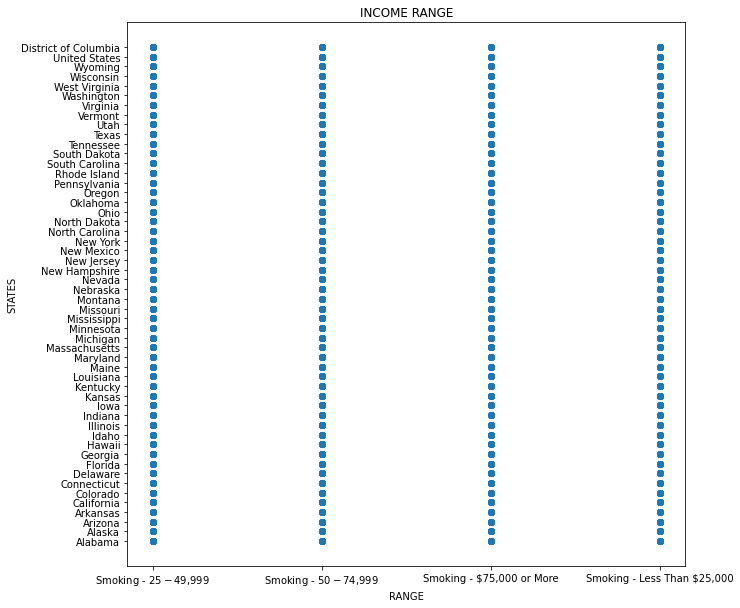

In [29]:
plt.figure(figsize=(10, 10))
plt.scatter(data = income_range, x = 'Measure Name', y ='State Name')
plt.xlabel('RANGE')
plt.ylabel('STATES')
plt.title('INCOME RANGE')

In [30]:
income_range.to_csv('income_range.csv', index=False)

In [31]:
excise_tax = pd.read_csv('../data/Excise Tax Rates on Packs of Cigarettes by State (In effect as of March 31, 2022 (n=58)).csv')
excise_tax

,LocationDesc,Data Range,ProvisionValue
0,Alabama,$0.50 to $0.99,0.675
1,Alaska,$2.00 to $3.99,2.000
2,American Samoa,$4.00 to $6.00,6.000
3,Arizona,$2.00 to $3.99,2.000
4,Arkansas,$1.00 to $1.49,1.150
5,California,$2.00 to $3.99,2.870
6,Colorado,$1.50 to $1.99,1.940
7,Connecticut,$4.00 to $6.00,4.350
8,Delaware,$2.00 to $3.99,2.100
9,District of Columbia,$4.00 to $6.00,4.940


In [32]:
excise_tax1 = pd.read_excel('../data/Combustible-Tobacco-Data_Table.xlsx')
excise_tax1

,Location,Cigarettes,Cigars,Little Cigars,Pipe Tobacco,Roll-Your-Own Tobacco
0,Alabama,$0.675 per pack,$0.0405 each,$0.0800 per pack of 20,$0.0356 per ounce,$0.0356 per ounce
1,Alaska,$2.000 per pack,75% Wholesale Price,75% Wholesale Price,75% Wholesale Price,75% Wholesale Price
2,American Samoa,$6.000 per pack,$0.3000 each,$6.0000 per pack of 20,$0.1050 per ounce,$0.1050 per ounce
3,Arizona,$2.000 per pack,$0.2180 each,$0.4405 per pack of 20,$0.2875 per ounce,$0.2875 per ounce
4,Arkansas,$1.150 per pack,68% Manufacturer's Sales Price,68% Manufacturer's Sales Price,68% Manufacturer's Sales Price,68% Manufacturer's Sales Price
5,California,$2.870 per pack,63.49% Wholesale Cost,$2.8700 per pack of 20,63.49% Wholesale Cost,63.49% Wholesale Cost
6,Colorado,$1.940 per pack,50% Manufacturer's List Price,50% Manufacturer's List Price,50% Manufacturer's List Price,50% Manufacturer's List Price
7,Connecticut,$4.350 per pack,50% Wholesale Sales Price,50% Wholesale Sales Price,50% Wholesale Sales Price,50% Wholesale Sales Price
8,Delaware,$2.100 per pack,30% Wholesale Price,30% Wholesale Price,30% Wholesale Price,30% Wholesale Price
9,District of Columbia,$4.940 per pack,No Provision,$4.9400 per pack of 20,96% Wholesale Sales Price,96% Wholesale Sales Price


In [33]:
excise_tax1.to_csv('excise_tax1.csv', index=False)

In [40]:
URL = 'https://en.wikipedia.org/wiki/Cigarette_taxes_in_the_United_States#cite_note-tobaccofreekids.org-24'

response = requests.get(URL)

In [41]:
response.status_code

200

In [42]:
soup = BS(response.text)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Cigarette taxes in the United States - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1201b530-6ee5-4e91-85a8-72582c3f8336","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Cigarette_taxes_in_the_United_States","wgTitle":"Cigarette taxes in the United States","wgCurRevisionId":1085038651,"wgRevisionId":1085038651,"wgArticleId":20587357,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Articles with short description","Short descrip

In [43]:
soup.findAll('table')

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Excise tax per pack (in USD)</th>
 <th>State or territory
 </th></tr>
 <tr>
 <td>0.675</td>
 <td><a href="/wiki/Alabama" title="Alabama">Alabama</a>
 </td></tr>
 <tr>
 <td>2.00</td>
 <td><a href="/wiki/Alaska" title="Alaska">Alaska</a>
 </td></tr>
 <tr>
 <td>2.00</td>
 <td><a href="/wiki/Arizona" title="Arizona">Arizona</a>
 </td></tr>
 <tr>
 <td>1.15</td>
 <td><a href="/wiki/Arkansas" title="Arkansas">Arkansas</a>
 </td></tr>
 <tr>
 <td>2.87</td>
 <td><a href="/wiki/California" title="California">California</a>
 </td></tr>
 <tr>
 <td>1.94</td>
 <td><a href="/wiki/Colorado" title="Colorado">Colorado</a>
 </td></tr>
 <tr>
 <td>4.35</td>
 <td><a href="/wiki/Connecticut" title="Connecticut">Connecticut</a>
 </td></tr>
 <tr>
 <td>2.10</td>
 <td><a href="/wiki/Delaware" title="Delaware">Delaware</a>
 </td></tr>
 <tr>
 <td>1.339</td>
 <td><a href="/wiki/Florida" title="Florida">Florida</a>
 </td></tr>
 <tr>
 <td>0.37</td>
 <td><a href="/w

In [44]:
soup.find('table', attrs={'class' : 'wikitable'})

<table class="wikitable sortable">
<tbody><tr>
<th>Excise tax per pack (in USD)</th>
<th>State or territory
</th></tr>
<tr>
<td>0.675</td>
<td><a href="/wiki/Alabama" title="Alabama">Alabama</a>
</td></tr>
<tr>
<td>2.00</td>
<td><a href="/wiki/Alaska" title="Alaska">Alaska</a>
</td></tr>
<tr>
<td>2.00</td>
<td><a href="/wiki/Arizona" title="Arizona">Arizona</a>
</td></tr>
<tr>
<td>1.15</td>
<td><a href="/wiki/Arkansas" title="Arkansas">Arkansas</a>
</td></tr>
<tr>
<td>2.87</td>
<td><a href="/wiki/California" title="California">California</a>
</td></tr>
<tr>
<td>1.94</td>
<td><a href="/wiki/Colorado" title="Colorado">Colorado</a>
</td></tr>
<tr>
<td>4.35</td>
<td><a href="/wiki/Connecticut" title="Connecticut">Connecticut</a>
</td></tr>
<tr>
<td>2.10</td>
<td><a href="/wiki/Delaware" title="Delaware">Delaware</a>
</td></tr>
<tr>
<td>1.339</td>
<td><a href="/wiki/Florida" title="Florida">Florida</a>
</td></tr>
<tr>
<td>0.37</td>
<td><a href="/wiki/Georgia_(U.S._state)" title="Georgia (U.

In [50]:
tax1 = pd.read_html(str(soup.find('table', attrs={'class' : 'wikitable'})))[0].head(51)
tax1

,Excise tax per pack (in USD),State or territory
0,0.675,Alabama
1,2.00,Alaska
2,2.00,Arizona
3,1.15,Arkansas
4,2.87,California
5,1.94,Colorado
6,4.35,Connecticut
7,2.10,Delaware
8,1.339,Florida
9,0.37,Georgia


In [51]:
tax1.to_csv('tax1.csv', index=False)

In [52]:
URL = 'https://en.wikipedia.org/wiki/Legality_of_cannabis_by_U.S._jurisdiction'

response = requests.get(URL)

In [53]:
response.status_code

200

In [54]:
soup = BS(response.text)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Legality of cannabis by U.S. jurisdiction - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7f9cae27-eca6-42ec-add0-fdc0add70aae","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Legality_of_cannabis_by_U.S._jurisdiction","wgTitle":"Legality of cannabis by U.S. jurisdiction","wgCurRevisionId":1101776474,"wgRevisionId":1101776474,"wgArticleId":31188467,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external 

In [55]:
soup.findAll('table')

[<table class="wikitable">
 <caption>Legend:
 </caption>
 <tbody><tr>
 <td><link href="mw-data:TemplateStyles:r981673959" rel="mw-deduplicated-inline-style"/><div class="legend"><span class="legend-color mw-no-invert" style="background-color:#196E92; color:white;"> </span> Legal for recreational use</div>
 </td>
 <td><link href="mw-data:TemplateStyles:r981673959" rel="mw-deduplicated-inline-style"/><div class="legend"><span class="legend-color mw-no-invert" style="background-color:#55B23A; color:black;"> </span> Legal for medical use</div>
 </td>
 <td><link href="mw-data:TemplateStyles:r981673959" rel="mw-deduplicated-inline-style"/><div class="legend"><span class="legend-color mw-no-invert" style="background-color:#C4C9CD; color:black;"> </span> Illegal</div>
 </td>
 <td><span style="color:red"><big>D</big></span> Decriminalized
 </td></tr></tbody></table>,
 <table class="wikitable sortable">
 <tbody><tr>
 <th>State
 </th>
 <th>
 </th>
 <th class="unsortable">Recreational
 </th>
 <th 

In [58]:
soup.find('table', attrs={'class' : 'wikitable sortable'})

<table class="wikitable sortable">
<tbody><tr>
<th>State
</th>
<th>
</th>
<th class="unsortable">Recreational
</th>
<th class="unsortable">Medical
</th>
<th class="unsortable">Transportation
</th>
<th class="unsortable">Cultivation
</th>
<th class="unsortable">Notes
</th></tr>
<tr>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/23px-Flag_of_Alabama.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/35px-Flag_of_Alabama.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/45px-Flag_of_Alabama.svg.png 2x" width="23"/> </span><a href="/wiki/Alabama" title="Alabama">Alabama</a>
</td>
<td style="background:#55B23A;"><span data-sort-value="3" style="display:none;"></span>
</td>
<td>Misdemeanor for first offense, subsequent offenses felony
</td>
<td>Legal
</td>
<

In [77]:
legal = pd.read_html(str(soup.find('table', attrs={'class' : 'wikitable sortable'})))[0]
legal

,State,Unnamed: 1,Recreational,Medical,Transportation,Cultivation,Notes
0,Alabama,NaN,"Misdemeanor for first offense, subsequent offe...",Legal,Not clearly stated,"Legal for licensed cultivators, not individual...",.mw-parser-output .hatnote{font-style:italic}....
1,Alaska,NaN,Legal,Legal,Up to 1 oz (28 g)[10],Twelve plants in a household with two adults 2...,Main article: Cannabis in Alaska Legalized by ...
2,Arizona,NaN,Legal,Legal,Up to 1 oz (28 g)[13],"Six plants in a household, or a maximum of 12 ...",Main article: Cannabis in Arizona Medical use ...
3,Arkansas,NaN,Illegal,Legal,Medical use only,Medical use only,Main article: Cannabis in Arkansas Possession ...
4,California,NaN,Legal,Legal,Up to 1 oz (28 g),"Legal (six plants for personal use, or a comme...",Main article: Cannabis in California July 1975...
5,Colorado,NaN,Legal,Legal,Up to 2 oz (57 g)[23],"Legal (six plants for personal use, or commerc...","Main article: Cannabis in Colorado November 6,..."
6,Connecticut,NaN,Legal,Legal,Legal to carry up to 1.5 oz (43 g) or possess ...,Legal (Up to three mature and three immature p...,"Main article: Cannabis in Connecticut June 22,..."
7,Delaware,D,Decriminalized (civil infraction),Legal,Medical use only,Medical use only,Main article: Cannabis in Delaware February 10...
8,Florida,NaN,Illegal,Legal,Medical use only,Medical use only,"Main article: Cannabis in Florida November 8, ..."
9,Georgia,NaN,Illegal; decriminalized in the cities of Atlan...,CBD oil (less than 5% THC),Medical use only,Illegal,Main article: Cannabis in Georgia (U.S. state)...


In [80]:
legal['Recreational'] = legal['Recreational'].str.rstrip('[49]')
legal

,State,Unnamed: 1,Recreational,Medical,Transportation,Cultivation,Notes
0,Alabama,NaN,"Misdemeanor for first offense, subsequent offe...",Legal,Not clearly stated,"Legal for licensed cultivators, not individual...",.mw-parser-output .hatnote{font-style:italic}....
1,Alaska,NaN,Legal,Legal,Up to 1 oz (28 g)[10],Twelve plants in a household with two adults 2...,Main article: Cannabis in Alaska Legalized by ...
2,Arizona,NaN,Legal,Legal,Up to 1 oz (28 g)[13],"Six plants in a household, or a maximum of 12 ...",Main article: Cannabis in Arizona Medical use ...
3,Arkansas,NaN,Illegal,Legal,Medical use only,Medical use only,Main article: Cannabis in Arkansas Possession ...
4,California,NaN,Legal,Legal,Up to 1 oz (28 g),"Legal (six plants for personal use, or a comme...",Main article: Cannabis in California July 1975...
5,Colorado,NaN,Legal,Legal,Up to 2 oz (57 g)[23],"Legal (six plants for personal use, or commerc...","Main article: Cannabis in Colorado November 6,..."
6,Connecticut,NaN,Legal,Legal,Legal to carry up to 1.5 oz (43 g) or possess ...,Legal (Up to three mature and three immature p...,"Main article: Cannabis in Connecticut June 22,..."
7,Delaware,D,Decriminalized (civil infraction),Legal,Medical use only,Medical use only,Main article: Cannabis in Delaware February 10...
8,Florida,NaN,Illegal,Legal,Medical use only,Medical use only,"Main article: Cannabis in Florida November 8, ..."
9,Georgia,NaN,Illegal; decriminalized in the cities of Atlan...,CBD oil (less than 5% THC),Medical use only,Illegal,Main article: Cannabis in Georgia (U.S. state)...


In [82]:
legal_use = legal.loc[legal['Recreational'] == 'Legal'].reset_index(drop = True)
legal_use

,State,Unnamed: 1,Recreational,Medical,Transportation,Cultivation,Notes
0,Alaska,NaN,Legal,Legal,Up to 1 oz (28 g)[10],Twelve plants in a household with two adults 2...,Main article: Cannabis in Alaska Legalized by ...
1,Arizona,NaN,Legal,Legal,Up to 1 oz (28 g)[13],"Six plants in a household, or a maximum of 12 ...",Main article: Cannabis in Arizona Medical use ...
2,California,NaN,Legal,Legal,Up to 1 oz (28 g),"Legal (six plants for personal use, or a comme...",Main article: Cannabis in California July 1975...
3,Colorado,NaN,Legal,Legal,Up to 2 oz (57 g)[23],"Legal (six plants for personal use, or commerc...","Main article: Cannabis in Colorado November 6,..."
4,Connecticut,NaN,Legal,Legal,Legal to carry up to 1.5 oz (43 g) or possess ...,Legal (Up to three mature and three immature p...,"Main article: Cannabis in Connecticut June 22,..."
5,Illinois,NaN,Legal,Legal,Up to 30 g (1.1 oz),"Five plants in home for medical use only, or c...",Main article: Cannabis in Illinois Cannabis Co...
6,Maine,NaN,Legal,Legal,Legal to carry up to 2.5 oz (71 g),"Up to three mature plants, twelve immature pla...",Main article: Cannabis in Maine 1913: Prohibit...
7,Massachusetts,NaN,Legal,Legal,Legal to carry up to 1 oz (28 g) outside the h...,Up to six plants for personal use or twelve pl...,Main article: Cannabis in Massachusetts 2008: ...
8,Michigan,NaN,Legal,Legal,Legal to carry up to 2.5 oz (71 g) outside the...,"Up to 12 plants per household, or commercially...",Main article: Cannabis in Michigan 2008: legal...
9,Montana,NaN,Legal,Legal,Legal to possess up to 1 oz (28 g) marijuana o...,Legal (Up to four plants per household),"Main article: Cannabis in Montana November 3, ..."
